# Calculate u for two-agent VO

In [1]:
import sys
sys.path.append('../')
import numpy as np
from numpy import linalg as la
import cvxpy as cp
from matplotlib import pyplot as plt
from matplotlib.patches import Circle
from panav.env import NavigationEnv, Box2DRegion, PolygonRegion, box_2d_center, line_seg_to_obstacle
from panav.viz import draw_env
from panav.ORCA import VO
%load_ext autoreload
%autoreload 2

## Demo: the velocity obstacle of agent 0 induced by agent 1

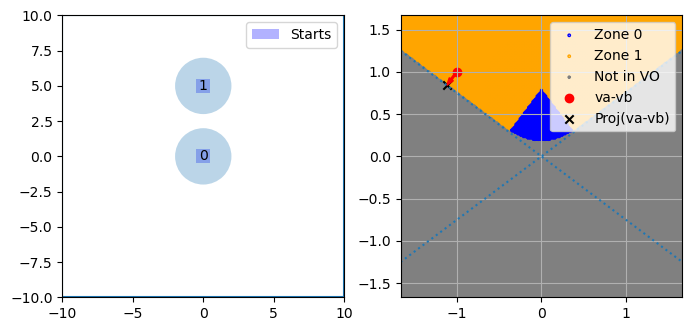

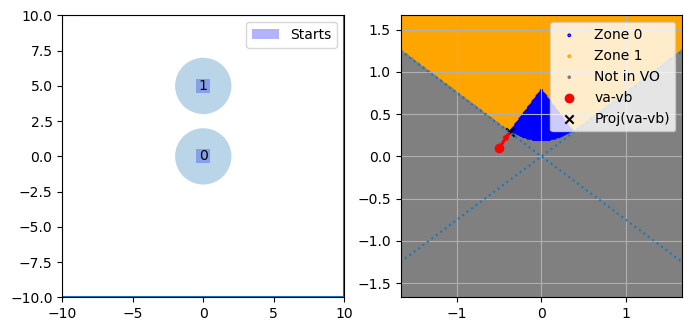

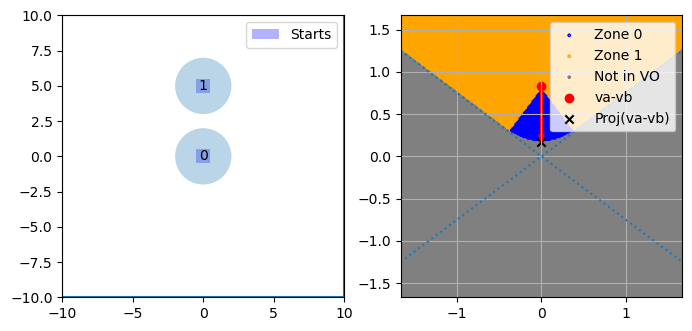

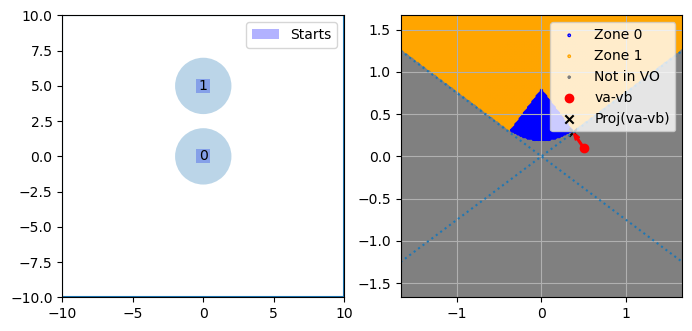

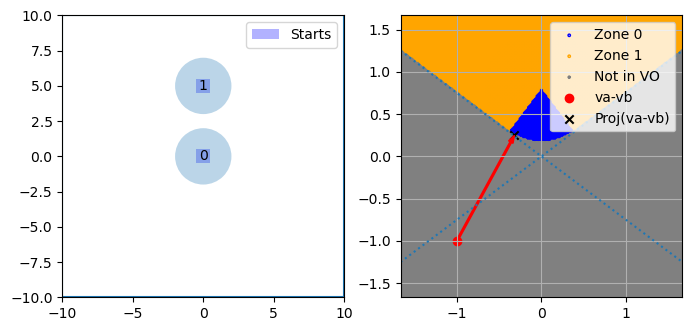

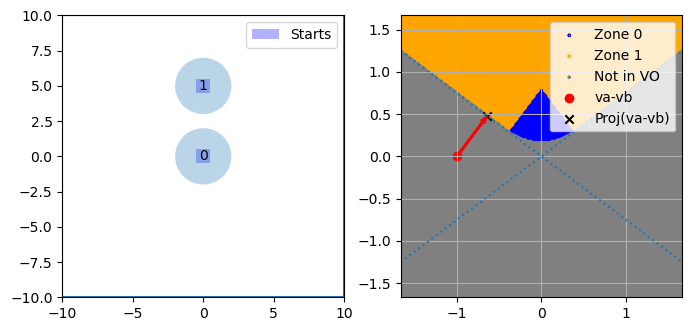

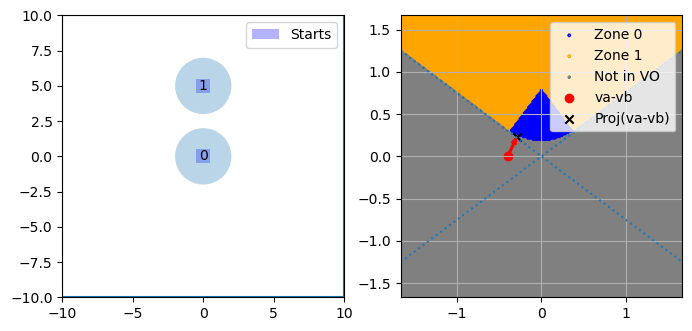

In [26]:

limits = [(-10.0,10.0),(-10.0,10.0)]
vmax = 1.0
bloating_r = 2.0
tau = 6



# start_locs = np.array([[0,0],[-5,0]])

start_locs = np.array([[0,0],[0,5]])

start_box_side = np.array([1,1])

starts = [box_2d_center(s,start_box_side) for s in start_locs]



# Compute the velocity obstacle of agent 0 induced by agent 1
pa, pb = start_locs[0], start_locs[1]

ra = rb = bloating_r

vo = VO(pa,pb,ra,rb,tau)

for test_pt in [
                np.array([-1,1]),
                np.array([-0.5,0.1]),
                vo.center,
                np.array([0.5,0.1]),
                np.array([-1,-1]),
                
                np.array([-1,0]),
                
                np.array([-0.4,0]),
               ]:

    fig,axes = plt.subplots(1,2,figsize=(8,6))

    # Plot environment
    env = NavigationEnv(limits,[],starts,[])

    draw_env(env,[],axes[0])

    for i in range(len(start_locs)):
        circ = Circle(start_locs[i], bloating_r,alpha = 0.3)
        axes[0].add_artist(circ)


    # Visualize the velocity obstacle
    ax = axes[1]

    vo.visualize(ax)
    
    u = vo.u(test_pt)
    proj = test_pt + u

    ax.scatter(*test_pt,marker = 'o', label = 'va-vb',color = 'r')


    ax.scatter(*proj,marker = 'x', label = 'Proj(va-vb)',color = 'k')
    
    ax.arrow(*test_pt, *u,width = 0.02,\
             color = 'r',length_includes_head = True,\
             )
    
   
    
    # ax.scatter(*proj,marker='o')
    
    
    ax.legend(loc = 'upper right')